In [2]:
!pip install requests
!pip install bs4
!pip install matplotlib

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def scrape_state(state: str) -> dict: #Function to get and storage states info into a dictionnaire
    print(f'Getting {state} info')
    state_url = f'https://www.ibge.gov.br/cidades-e-estados/{state}.html'
    page = requests.get(state_url)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    indicators = soup.select('.indicador')
    
    state_dict = {
        ind.select('.ind-label')[0].text: ind.select('.ind-value')[0].text
        for ind in indicators
    }
    state_dict['Estado'] = state
    return state_dict
scrape_state('sp')

Getting sp info


{'Governador': 'RODRIGO GARCIA\xa0\xa0\xa0[2019]',
 'Capital': 'São Paulo\xa0\xa0\xa0[2010]',
 'Gentílico': 'paulista',
 'Área Territorial': '248.219,485 km²\xa0\xa0\xa0[2021]',
 'População estimada': '46.649.132 pessoas\xa0\xa0\xa0[2021]',
 'Densidade demográfica': '166,25 hab/km²\xa0\xa0\xa0[2010]',
 'Matrículas no ensino fundamental': '5.396.803 matrículas\xa0\xa0\xa0[2021]',
 'IDH Índice de desenvolvimento humano': '0,783\xa0\xa0\xa0[2010]',
 'Receitas realizadas': '232.822.496,57 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Despesas empenhadas': '231.982.243,69 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Rendimento mensal domiciliar per capita': '1.836 R$\xa0\xa0\xa0[2021]',
 'Total de veículos': '31.455.473 veículos\xa0\xa0\xa0[2021]',
 'Estado': 'sp'}

In [5]:
states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

states_data = [scrape_state(state) for state in states]

Getting AC info
Getting AL info
Getting AP info
Getting AM info
Getting BA info
Getting CE info
Getting DF info
Getting ES info
Getting GO info
Getting MA info
Getting MT info
Getting MS info
Getting MG info
Getting PA info
Getting PB info
Getting PR info
Getting PE info
Getting PI info
Getting RJ info
Getting RN info
Getting RS info
Getting RO info
Getting RR info
Getting SC info
Getting SP info
Getting SE info
Getting TO info


In [6]:
df = pd.DataFrame(states_data)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Governador                               27 non-null     object
 1   Capital                                  27 non-null     object
 2   Gentílico                                27 non-null     object
 3   Área Territorial                         27 non-null     object
 4   População estimada                       27 non-null     object
 5   Densidade demográfica                    27 non-null     object
 6   Matrículas no ensino fundamental        27 non-null     object
 7   IDH Índice de desenvolvimento humano    27 non-null     object
 8   Receitas realizadas                      27 non-null     object
 9   Despesas empenhadas                      27 non-null     object
 10  Rendimento mensal domiciliar per capita  27 non-null     object


In [7]:
state_df = df.copy()
state_df.columns = ['governor', 'capital', 'gentile', 'area', 'population', 'demographic_density', 'primary_school_enrollment', 'idh', 'realized_revenue', 'committed_expenses', 'income_per_capita', 'vehicle_total', 'code']
state_df = state_df[['code', 'governor', 'population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']]
state_df

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
0,AC,GLADSON DE LIMA CAMELI [2019],906.876 pessoas [2021],"164.173,431 km² [2021]","0,663 [2010]",888 R$ [2021],320.173 veículos [2021],153.015 matrículas [2021],"6.084.416,81 R$ (×1000) [2017]","6.632.883,11 R$ (×1000) [2017]"
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO [2019],3.365.351 pessoas [2021],"27.830,661 km² [2021]","0,631 [2010]",777 R$ [2021],981.823 veículos [2021],458.782 matrículas [2021],"10.460.634,92 R$ (×1000) [2017]","11.950.438,46 R$ (×1000) [2017]"
2,AP,ANTONIO WALDEZ GÓES DA SILVA [2019],877.613 pessoas [2021],"142.470,762 km² [2021]","0,708 [2010]",855 R$ [2021],224.208 veículos [2021],133.839 matrículas [2021],"4.224.464,09 R$ (×1000) [2017]","5.396.417,14 R$ (×1000) [2017]"
3,AM,WILSON MIRANDA LIMA [2019],4.269.995 pessoas [2021],"1.559.167,878 km² [2021]","0,674 [2010]",800 R$ [2021],1.014.026 veículos [2021],702.763 matrículas [2021],"15.324.896,56 R$ (×1000) [2017]","17.328.459,43 R$ (×1000) [2017]"
4,BA,RUI COSTA DOS SANTOS [2019],14.985.284 pessoas [2021],"564.760,429 km² [2021]","0,660 [2010]",843 R$ [2021],4.695.972 veículos [2021],1.946.957 matrículas [2021],"45.570.160,00 R$ (×1000) [2017]","50.191.003,24 R$ (×1000) [2017]"
5,CE,CAMILO SOBREIRA DE SANTANA [2019],9.240.580 pessoas [2021],"148.894,447 km² [2021]","0,682 [2010]",881 R$ [2021],3.513.199 veículos [2021],1.161.434 matrículas [2021],"24.608.352,18 R$ (×1000) [2017]","28.420.222,47 R$ (×1000) [2017]"
6,DF,IBANEIS ROCHA BARROS JUNIOR [2019],3.094.325 pessoas [2021],"5.760,784 km² [2021]","0,824 [2010]",2.513 R$ [2021],1.979.698 veículos [2021],369.128 matrículas [2021],"21.990.464,68 R$ (×1000) [2017]","23.812.211,27 R$ (×1000) [2017]"
7,ES,JOSE RENATO CASAGRANDE [2019],4.108.508 pessoas [2021],"46.074,448 km² [2021]","0,740 [2010]",1.295 R$ [2021],2.160.432 veículos [2021],503.003 matrículas [2021],"14.392.338,00 R$ (×1000) [2017]","19.685.616,74 R$ (×1000) [2017]"
8,GO,RONALDO RAMOS CAIADO [2019],7.206.589 pessoas [2021],"340.242,856 km² [2021]","0,735 [2010]",1.276 R$ [2021],4.369.349 veículos [2021],855.021 matrículas [2021],"24.248.380,34 R$ (×1000) [2017]","37.885.335,17 R$ (×1000) [2017]"
9,MA,FLÁVIO DINO DE CASTRO E COSTA [2019],7.153.262 pessoas [2021],"329.651,496 km² [2021]","0,639 [2010]",635 R$ [2021],1.940.475 veículos [2021],1.112.636 matrículas [2021],"17.627.170,76 R$ (×1000) [2017]","18.503.261,35 R$ (×1000) [2017]"


In [8]:
state_df = state_df.replace({
    '\.': '',
    ',' : '.',
    '\[\d+\]' : '',
    ' km²': '',
    ' pessoas' : '',
    ' hab/km²' : '',
    ' pessoas' : '',
    ' matrículas' : '',
    'R\$.*' : '',
    ' veículos' : ''
}, regex = True)

state_df.head()

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
0,AC,GLADSON DE LIMA CAMELI,906876,164173.431,0.663,888,320173,153015,6084416.81,6632883.11
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO,3365351,27830.661,0.631,777,981823,458782,10460634.92,11950438.46
2,AP,ANTONIO WALDEZ GÓES DA SILVA,877613,142470.762,0.708,855,224208,133839,4224464.09,5396417.14
3,AM,WILSON MIRANDA LIMA,4269995,1559167.878,0.674,800,1014026,702763,15324896.56,17328459.43
4,BA,RUI COSTA DOS SANTOS,14985284,564760.429,0.660,843,4695972,1946957,45570160.00,50191003.24


In [9]:
num_cols = ['population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']
state_df[num_cols] = state_df[num_cols].apply(lambda x: x.str.strip())
state_df[num_cols] = state_df[num_cols].apply(pd.to_numeric)
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code                       27 non-null     object 
 1   governor                   27 non-null     object 
 2   population                 27 non-null     int64  
 3   area                       27 non-null     float64
 4   idh                        27 non-null     float64
 5   income_per_capita          27 non-null     int64  
 6   vehicle_total              27 non-null     int64  
 7   primary_school_enrollment  27 non-null     int64  
 8   committed_expenses         27 non-null     float64
 9   realized_revenue           27 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.2+ KB


In [10]:
#state_df.to_csv('states_clean.csv')

In [11]:
state_df.describe()


,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
count,2.700000e+01,2.700000e+01,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,7.900653e+06,3.151980e+05,0.704519,1187.074074,4.127662e+06,9.820593e+05,3.238823e+07,3.570786e+07
std,9.380644e+06,3.751190e+05,0.049284,439.706801,6.212933e+06,1.072974e+06,4.591218e+07,4.590811e+07
min,6.527130e+05,5.760784e+03,0.631000,635.000000,2.242080e+05,1.031230e+05,3.865094e+06,4.266319e+06
25%,2.966756e+06,7.609897e+04,0.664000,851.000000,1.063652e+06,3.805515e+05,9.875718e+06,1.203733e+07
50%,4.108508e+06,2.236445e+05,0.699000,1028.000000,1.979698e+06,5.409190e+05,1.762717e+07,1.968562e+07
75%,9.457686e+06,3.349472e+05,0.737500,1416.500000,4.532660e+06,1.253921e+06,2.945779e+07,3.681568e+07
max,4.664913e+07,1.559168e+06,0.824000,2513.000000,3.145547e+07,5.396803e+06,2.319822e+08,2.328225e+08


[Text(0.5, 0, 'Estado'),
 Text(0, 0.5, 'IDH'),
 Text(0.5, 1.0, 'Índice de Desenvolvimento Humano')]

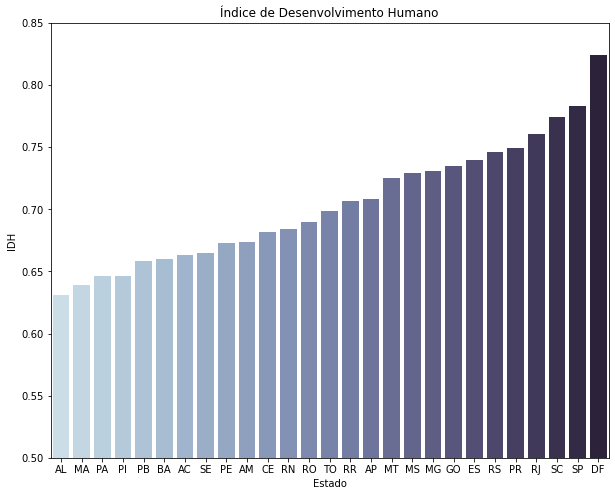

In [12]:
plt.figure(figsize=(10,8))
idh_plot = sns.barplot(y='idh',x='code',data=state_df.sort_values(by = ['idh']), palette="ch:s=.25,rot=-.25")
idh_plot.set_ylim(0.5, 0.85)
idh_plot.set(xlabel='Estado', ylabel='IDH', title = 'Índice de Desenvolvimento Humano')


[Text(0.5, 0, 'Estado'),
 Text(0, 0.5, 'Matrículas em Escola'),
 Text(0.5, 1.0, 'Crianças Matriculadas em Escolas')]

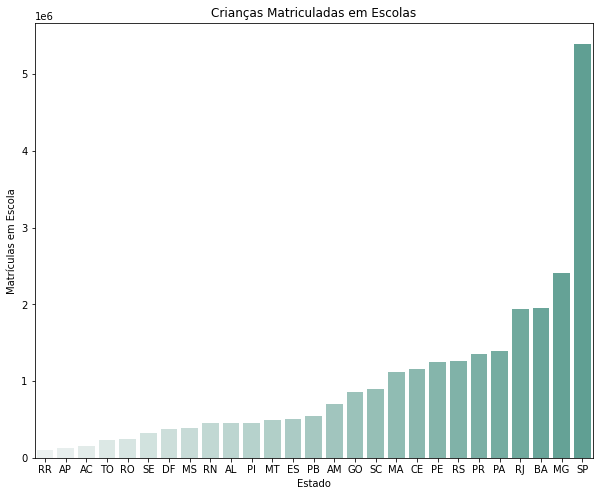

In [13]:
plt.figure(figsize=(10,8))
idh_plot = sns.barplot(y='primary_school_enrollment',x='code',data=state_df.sort_values(by = ['primary_school_enrollment']), palette='light:#5A9')
#idh_plot.set_ylim(0.5, 0.85)
idh_plot.set(xlabel='Estado', ylabel='Matrículas em Escola', title = 'Crianças Matriculadas em Escolas')

<AxesSubplot:xlabel='idh', ylabel='primary_school_enrollment'>

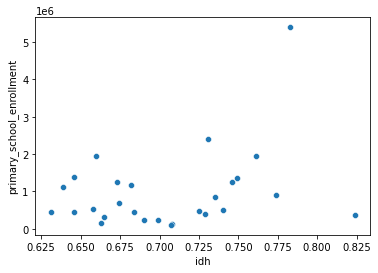

In [74]:
sns.scatterplot(data = state_df, x = 'idh', y = 'primary_school_enrollment')

In [68]:
corr_idh = state_df.corr()
corr_idh.head()

,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
population,1.000000,0.046234,0.369249,0.356005,0.968999,0.995654,0.981600,0.983735
area,0.046234,1.000000,-0.210449,-0.224812,-0.016971,0.100482,0.012395,0.009160
idh,0.369249,-0.210449,1.000000,0.941343,0.482219,0.315260,0.455015,0.478451
income_per_capita,0.356005,-0.224812,0.941343,1.000000,0.458078,0.306241,0.443502,0.463393
vehicle_total,0.968999,-0.016971,0.482219,0.458078,1.000000,0.952214,0.991156,0.991814


In [91]:
df_new = corr_idh.iloc[2:3,[0,3,4,5]]
df_idh_overview = df_new.T.sort_values(by='idh')
df_idh_overview

,idh
primary_school_enrollment,0.315260
population,0.369249
vehicle_total,0.482219
income_per_capita,0.941343


<AxesSubplot:>

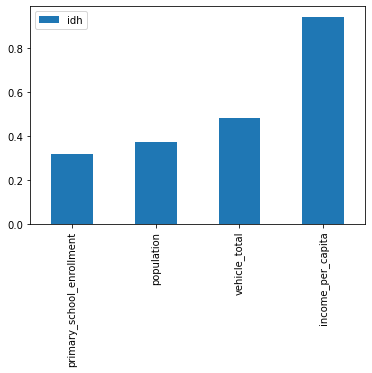

In [93]:
df_idh_overview.plot.bar()